In [1]:
import numpy as np

# 构建无向带权图
W = np.array([[0, 1, 1, 0, 0, 0],
              [1, 0, 1, 1, 0, 0],
              [1, 1, 0, 1, 0, 0],
              [0, 1, 1, 0, 1, 1],
              [0, 0, 0, 1, 0, 1],
              [0, 0, 0, 1, 1, 0]])
n = len(W)

# 计算度数矩阵
D = np.diag(np.sum(W, axis=1))

# 计算邻接矩阵
A = W + W.T

# 计算模块度
k = np.sum(W)
q = np.sum(A) / (2 * k)
S = np.outer(np.sum(W, axis=1), np.sum(W, axis=1)) / (2 * k)
Q = np.sum((W - S) * A) / (2 * k)

# Louvain算法
C = np.arange(n)  # 初始时每个节点为一个社区
while True:
    C_old = np.copy(C)
    for i in range(n):
        dQ = np.zeros(n)
        for j in range(n):
            if C[i] == C[j]:
                dQ[j] = (W[i, j] - S[i, j]) / k - 2 * A[i, j] / (2 * k)**2
            else:
                dQ[j] = (W[i, j] - S[i, j]) / k - A[i, j] / (2 * k)**2
        C[i] = np.argmax(dQ)
    if np.array_equal(C, C_old):
        break

# 输出结果
print('Final partition:', C)


Final partition: [1 0 0 4 5 4]


{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 3, 9: 3, 10: 1, 11: 0, 12: 0, 13: 0, 14: 3, 15: 3, 16: 1, 17: 0, 18: 3, 19: 0, 20: 3, 21: 0, 22: 3, 23: 3, 24: 2, 25: 2, 26: 3, 27: 3, 28: 2, 29: 3, 30: 3, 31: 2, 32: 3, 33: 3}


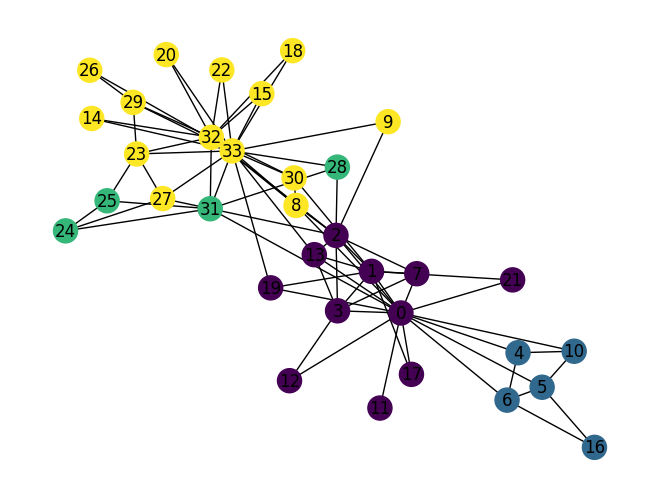

In [3]:
import networkx as nx
import community

# 构建网络
G = nx.karate_club_graph()

# 使用Louvain算法进行分割
partition = community.best_partition(G)
print(partition)

# 可视化分割结果
pos = nx.spring_layout(G)
colors = [partition[n] for n in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True)

In [4]:
g = nx.Graph(W)

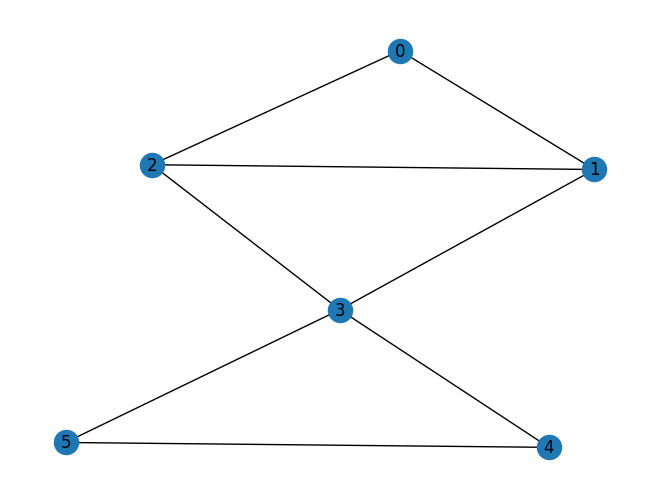

In [7]:
nx.draw(g, with_labels=True)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1}


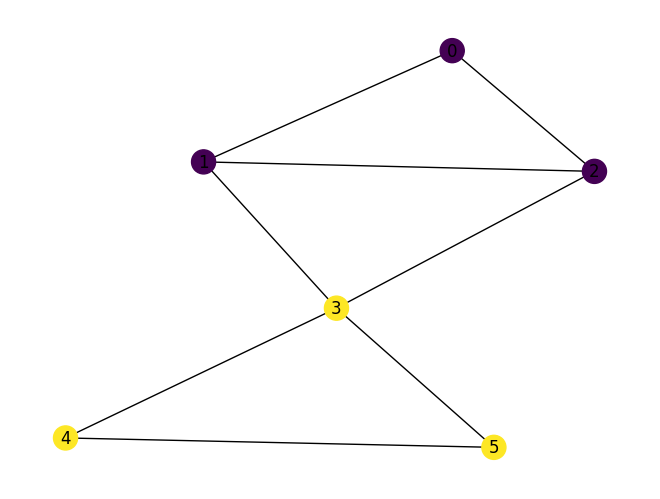

In [9]:
partition = community.best_partition(g)
print(partition)

pos = nx.spring_layout(g)
colors = [partition[n] for n in g.nodes()]
nx.draw(g, pos, node_color=colors, with_labels=True)